In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
data = np.loadtxt('data/usa.txt')
data

array([1.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
       3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
       0.0000e+00, 3.6000e+01, 0.0000e+00, 6.0000e+00, 1.0000e+00,
       2.0000e+00, 8.0000e+00, 6.0000e+00, 2.4000e+01, 2.0000e+01,
       3.1000e+01, 6.8000e+01, 4.5000e+01, 1.4000e+02, 1.1600e+02,
       6.5000e+01, 3.7600e+02, 3.2200e+02, 3.8200e+02, 5.1600e+02,
       5.4800e+02, 7.7200e+02, 1.1330e+03, 1.7890e+03, 1.3620e+03,
       5.9640e+03, 5.5260e+03, 6.3270e+03, 7.6760e+03, 1.0571e+04,
       9.8930e+03, 1.2038e+04, 1.8058e+04, 1.7821e+04, 1.9808e+04,
       1.9444e+04, 2.0922e+04, 2.6341e+04, 2.5200e+04, 3.0390e+04,
       3.1824e+04, 3.3267e+04, 2.8219e+04, 2.9595e+04, 2.9556e

In [3]:
n = len(data)
n

83

In [4]:
g = data.cumsum()
g

array([1.00000e+00, 1.00000e+00, 4.00000e+00, 4.00000e+00, 4.00000e+00,
       4.00000e+00, 4.00000e+00, 6.00000e+00, 7.00000e+00, 7.00000e+00,
       1.00000e+01, 1.00000e+01, 1.00000e+01, 1.00000e+01, 1.00000e+01,
       1.00000e+01, 1.00000e+01, 1.00000e+01, 1.10000e+01, 1.10000e+01,
       1.20000e+01, 1.20000e+01, 1.20000e+01, 1.20000e+01, 1.20000e+01,
       1.20000e+01, 1.20000e+01, 1.20000e+01, 1.40000e+01, 1.40000e+01,
       1.40000e+01, 5.00000e+01, 5.00000e+01, 5.60000e+01, 5.70000e+01,
       5.90000e+01, 6.70000e+01, 7.30000e+01, 9.70000e+01, 1.17000e+02,
       1.48000e+02, 2.16000e+02, 2.61000e+02, 4.01000e+02, 5.17000e+02,
       5.82000e+02, 9.58000e+02, 1.28000e+03, 1.66200e+03, 2.17800e+03,
       2.72600e+03, 3.49800e+03, 4.63100e+03, 6.42000e+03, 7.78200e+03,
       1.37460e+04, 1.92720e+04, 2.55990e+04, 3.32750e+04, 4.38460e+04,
       5.37390e+04, 6.57770e+04, 8.38350e+04, 1.01656e+05, 1.21464e+05,
       1.40908e+05, 1.61830e+05, 1.88171e+05, 2.13371e+05, 2.437

In [5]:
M = data.max()
tM, = np.where(data == data.max())[0] + 1
M, tM

(35098.0, 78)

In [6]:
tM1 = round(tM-0.15*n)
tM2 = round(tM+0.15*n)
tM1, tM2

(66, 90)

In [7]:
_sum = data.sum()

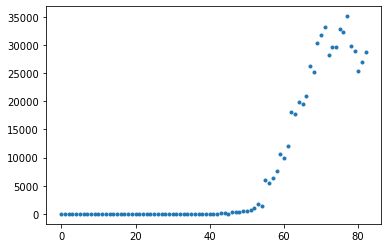

In [8]:
plt.plot(data, '.')
plt.show()

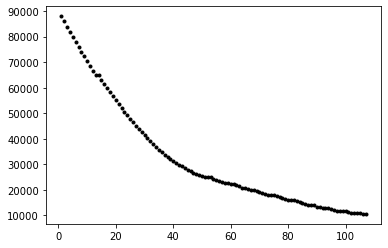

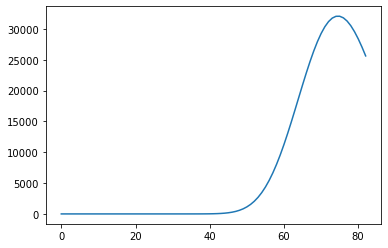

In [9]:
f = np.empty(n)
mloss = 1e90
itr = 0

for c in np.arange(-0.05, -1.51, -0.05):
    start, end = -c*tM1, (-c*tM2)+0.1
    for b in np.arange(start, end, 0.1):
        for i in range(n):
            f[i] = np.power(i+1, b) * np.exp(c*(i+1))
        a = _sum / f.sum()
        F = a * f
        loss = np.linalg.norm(data-F)
        if loss < mloss:
            besta = a
            bestb = b
            bestc = c
            bestarea = np.around(F.sum(), 2)
            mloss = loss;
            itr += 1
            F2plt = F
            plt.plot(itr, loss, 'k.')
plt.show()
plt.plot(F2plt)
plt.show()        

In [10]:
preinflex = -(bestb-math.sqrt(bestb))/bestc
peak = -bestb/bestc
cases_day = besta*(np.power(peak, bestb))*np.exp(bestc*peak)
postinflex = -(bestb+math.sqrt(bestb))/bestc

print(f'CONSERVATION CHECK {bestarea:.2f} - {_sum:.2f} = {bestarea - _sum}')
print(f'REGRESSION COEFS: A = {besta:.4g} B = {bestb:.2f} C = {bestc:.2f}')
print(f"FINAL LOSS = {mloss:.2f}")
print(f"PONTO DE INFLEXÃO INICIAL = {preinflex:.2f}")
print(f"PONTO DE MAXIMO: DIA = {int(peak)} | CASOS/DIA = {cases_day:.2f}")
print(f"PONTO DE INFLEXÃO POSTERIOR = {postinflex:.2f}")
print(f"DIAS DE DADOS = {n}")

CONSERVATION CHECK 636349.00 - 636349.00 = 0.0
REGRESSION COEFS: A = 4.093e-67 B = 49.10 C = -0.65
FINAL LOSS = 10538.46
PONTO DE INFLEXÃO INICIAL = 64.76
PONTO DE MAXIMO: DIA = 75 | CASOS/DIA = 32082.54
PONTO DE INFLEXÃO POSTERIOR = 86.32
DIAS DE DADOS = 83


In [11]:
m = 1000
F = []
G = [0]
for i in range(m):
    F.append(besta*(np.power(i+1,bestb))*np.exp(bestc*(i+1)))
    if i+1 > 1:
        G.append(G[i-1] + F[i])
    if i+1 > peak and F[i] < 0.001:
        m = i
        break

Text(0, 0.5, 'NOVOS CASOS DIARIOS')

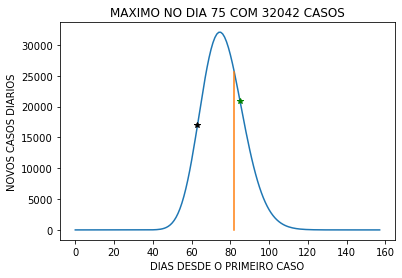

In [12]:
plt.plot(F)
if n < m:
    plt.plot([n-1,n-1], [0,F[n-1]])
plt.plot(int(preinflex)-1, F[int(preinflex)-1], "k*")
plt.plot(int(postinflex)-1, F[int(postinflex)-1], "g*")
plt.title(f'MAXIMO NO DIA {int(peak)} COM {int(F[int(peak)-1])} CASOS')
plt.xlabel('DIAS DESDE O PRIMEIRO CASO')
plt.ylabel('NOVOS CASOS DIARIOS')

Text(0, 0.5, 'NUMERO DE CASOS CONFIRMADOS')

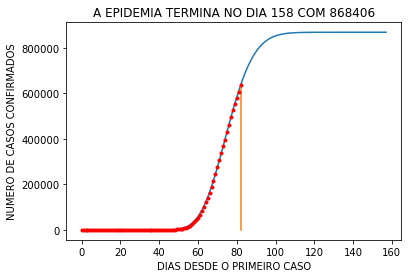

In [13]:
plt.plot(G)
if n < m:
    plt.plot([n-1,n-1], [0,G[n-1]])
plt.plot(g, 'r.')
plt.title(f'A EPIDEMIA TERMINA NO DIA {m+1} COM {int(G[m])}')
plt.xlabel('DIAS DESDE O PRIMEIRO CASO')
plt.ylabel('NUMERO DE CASOS CONFIRMADOS')

In [14]:
print(f'EPIDEMIC ENDS DAY = {m+1} WITH A TOTAL NUMBER OF INFECTED = {int(G[m])}')

EPIDEMIC ENDS DAY = 158 WITH A TOTAL NUMBER OF INFECTED = 868406
